# Result Validation

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# TRAINING AND VALIDATION

In [24]:
df_training_bayes_resnet18 = pd.read_csv('./../deep_gp/bayes-resnet18-cancer.csv')
df_training_freq_resnet18 = pd.read_csv('./../deep_gp/frequentist-resnet18-cancer.csv')
df_training_bayes_3conv3fc = pd.read_csv('./../bayes_by_backprop/bayes-3conv3fc-cancer.csv')
df_training_freq_3conv3fc = pd.read_csv('./../bayes_by_backprop/frequentist-3conv3fc-cancer.csv')

In [26]:
df_training_bayes_resnet18.head()

,epoch,train_acc,validation_acc,time
0,1,87.414,87.667,418.902717
1,2,82.222,81.936,428.266219
2,3,82.835,82.386,445.201225
3,4,81.454,80.577,451.708237
4,5,82.597,82.775,433.035298


In [34]:
df_training_bayes_resnet18['Experiment'] = 'B-Resnet'
df_training_bayes_resnet18['Approach'] = 'Bayesian'
df_training_bayes_resnet18['Architecture'] = 'Resnet-18'

df_training_freq_resnet18['Experiment'] = 'F-Resnet18'
df_training_freq_resnet18['Approach'] = 'Frequentist'
df_training_freq_resnet18['Architecture'] = 'Resnet-18'

df_training_bayes_3conv3fc['Experiment'] = 'B-3Conv3FC'
df_training_bayes_3conv3fc['Approach'] = 'Bayesian'
df_training_bayes_3conv3fc['Architecture'] = '3Conv3FC'

df_training_freq_3conv3fc['Experiment'] = 'F-3Conv3FC'
df_training_freq_3conv3fc['Approach'] = 'Frequentist'
df_training_freq_3conv3fc['Architecture'] = '3Conv3FC'

df_training = pd.concat([df_training_bayes_resnet18, df_training_freq_resnet18,
                        df_training_bayes_3conv3fc, df_training_freq_3conv3fc], sort=False)
df_training.rename(columns={'epoch': 'Epoch',
                           'train_acc': 'Training Accuracy',
                           'validation_acc': 'Validation Accuracy',
                           'time': 'Time (s)'}, inplace=True)

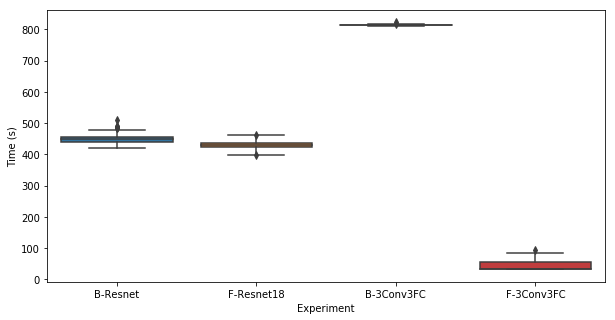

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Experiment', y='Time (s)', data=df_training)
plt.savefig('./images/time-per-epoch.png')

In [ ]:
## Accuracy at training

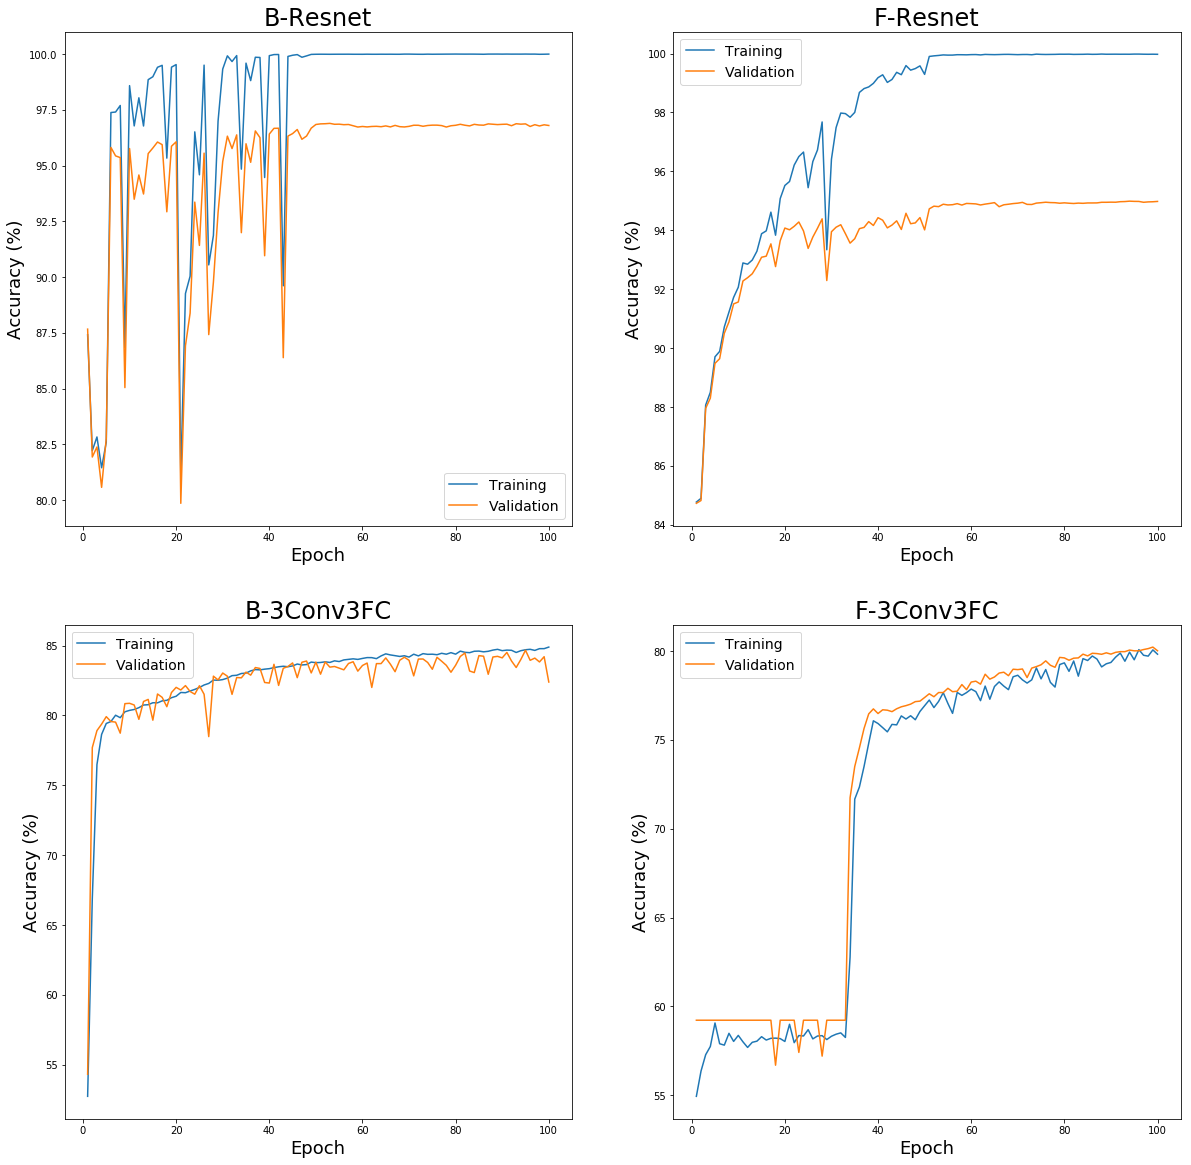

In [78]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,  figsize=(20,20))
ax1.plot(list(df_training_bayes_resnet18['epoch'].values), list(df_training_bayes_resnet18['train_acc'].values))
ax1.plot(list(df_training_bayes_resnet18['epoch'].values), list(df_training_bayes_resnet18['validation_acc'].values))
ax1.legend(['Training', 'Validation'], fontsize=14)
ax1.set_xlabel('Epoch', fontsize=18)
ax1.set_ylabel('Accuracy (%)', fontsize=18)
ax1.set_title('B-Resnet', fontsize=24)

ax2.plot(list(df_training_freq_resnet18['epoch'].values), list(df_training_freq_resnet18['train_acc'].values))
ax2.plot(list(df_training_freq_resnet18['epoch'].values), list(df_training_freq_resnet18['validation_acc'].values))
ax2.legend(['Training', 'Validation'], fontsize=14)
ax2.set_xlabel('Epoch', fontsize=18)
ax2.set_ylabel('Accuracy (%)', fontsize=18)
ax2.set_title('F-Resnet', fontsize=24)

ax3.plot(list(df_training_bayes_3conv3fc['epoch'].values), list(df_training_bayes_3conv3fc['train_acc'].values))
ax3.plot(list(df_training_bayes_3conv3fc['epoch'].values), list(df_training_bayes_3conv3fc['validation_acc'].values))
ax3.legend(['Training', 'Validation'], fontsize=14)
ax3.set_xlabel('Epoch', fontsize=18)
ax3.set_ylabel('Accuracy (%)', fontsize=18)
ax3.set_title('B-3Conv3FC', fontsize=24)

ax4.plot(list(df_training_freq_3conv3fc['epoch'].values), list(df_training_freq_3conv3fc['train_acc'].values))
ax4.plot(list(df_training_freq_3conv3fc['epoch'].values), list(df_training_freq_3conv3fc['validation_acc'].values))
ax4.legend(['Training', 'Validation'], fontsize=14)
ax4.set_xlabel('Epoch', fontsize=18)
ax4.set_ylabel('Accuracy (%)', fontsize=18)
ax4.set_title('F-3Conv3FC', fontsize=24)

plt.savefig('./images/accuracy-training.png')

In [79]:
df_training.groupby('Experiment')['Training Accuracy', 'Validation Accuracy'].max()

,Training Accuracy,Validation Accuracy
Experiment,,
B-3Conv3FC,84.889,84.662
B-Resnet,99.995,96.889
F-3Conv3FC,80.073,80.216
F-Resnet18,99.984,94.989


# TESTING RESULTS

In [4]:
y_all_dgp = pd.read_hdf('./test-results/y_all-DGP.h5', 'y_all')
y_all_resnet18 = pd.read_hdf('./test-results/y_all-resnet18.h5', 'y_all')
y_all_Freq_3Conv3FC = pd.read_hdf('./test-results/y_all-Freq_3Conv3FC.h5', 'y_all')
y_all_BBB = pd.read_hdf('./test-results/y_all-BBB.h5', 'y_all')

# y_all_resnet = pd.read_hdf('./test-results/y_all-Resnet', 'y_all')

In [89]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

def get_roc_auc_score(y_all):
    return roc_auc_score(y_all['y_true'].values, y_all['y_pred'].values)

def get_accuracy(y_all):
    return accuracy_score(y_all['y_true'].values, y_all['y_pred'].values)

def get_confusion_matrix(y_all):
    return confusion_matrix(y_all['y_true'].values, y_all['y_pred'].values, labels=[0, 1])



In [16]:
def plot_confusion_matrix(y_all):
    cm = get_confusion_matrix(y_all)
    plt.figure()
    plt.title('Confusion Matrix')
    ax = sns.heatmap(cm)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Real')
    plt.show()
    return cm

## Metrics

In [ ]:
# Area under the Curve

In [17]:
auc_b_resnet = get_roc_auc_score(y_all=y_all_dgp)
auc_f_resnet = get_roc_auc_score(y_all=y_all_resnet18)
auc_b_3Conv3FC = get_roc_auc_score(y_all=y_all_BBB)
auc_f_3Conv3FC = get_roc_auc_score(y_all=y_all_Freq_3Conv3FC)

aucs = [auc_b_resnet, auc_f_resnet, auc_b_3Conv3FC, auc_f_3Conv3FC]

df_metrics = pd.DataFrame({'AUC': aucs, 
                          'Experiment': ['B-Resnet', 'F-Resnet18', 'B-3Conv3FC', 'F-3Conv3FC'],
                          'Approach': ['Bayesian', 'Frequentist', 'Bayesian', 'Frequentist'],
                          'Architecture': ['Resnet-18', 'Resnet-18', '3Conv3FC', '3Conv3FC']})
df_metrics

,AUC,Experiment,Approach,Architecture
0,0.965999,B-Resnet,Bayesian,Resnet-18
1,0.950370,F-Resnet18,Frequentist,Resnet-18
2,0.797808,B-3Conv3FC,Bayesian,3Conv3FC
3,0.782228,F-3Conv3FC,Frequentist,3Conv3FC


In [90]:
acc_b_resnet = get_accuracy(y_all=y_all_dgp)
acc_f_resnet = get_accuracy(y_all=y_all_resnet18)
acc_b_3Conv3FC = get_accuracy(y_all=y_all_BBB)
acc_f_3Conv3FC = get_accuracy(y_all=y_all_Freq_3Conv3FC)

accs = [acc_b_resnet, acc_f_resnet, acc_b_3Conv3FC, acc_f_3Conv3FC]

df_metrics['Accuracy'] = accs
df_metrics

,AUC,Experiment,Approach,Architecture,Accuracy
0,0.965999,B-Resnet,Bayesian,Resnet-18,0.968231
1,0.950370,F-Resnet18,Frequentist,Resnet-18,0.952710
2,0.797808,B-3Conv3FC,Bayesian,3Conv3FC,0.828406
3,0.782228,F-3Conv3FC,Frequentist,3Conv3FC,0.801159


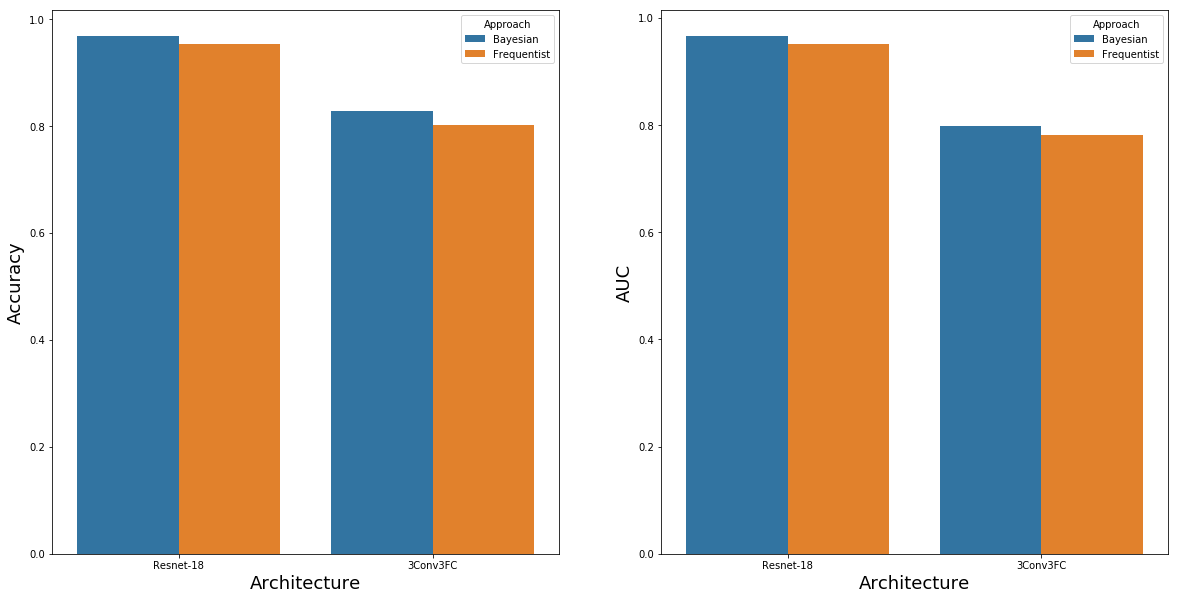

In [95]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1 = sns.barplot(x='Architecture', y='Accuracy', hue='Approach', data=df_metrics, ax=ax1)
ax1.set_xlabel('Architecture', fontsize=18)
ax1.set_ylabel('Accuracy', fontsize=18)

ax2 = sns.barplot(x='Architecture', y='AUC', hue='Approach', data=df_metrics, ax=ax2)
ax2.set_xlabel('Architecture', fontsize=18)
ax2.set_ylabel('AUC', fontsize=18)

plt.savefig('./images/metrics_per_model.png')

In [ ]:
# Confusion Matrix

In [85]:
y_alls = [y_all_dgp, y_all_resnet18, y_all_BBB, y_all_Freq_3Conv3FC]
experiments = ['B-Resnet', 'F-Resnet18', 'B-3Conv3FC', 'F-3Conv3FC']
chunks=[]
for i, y_all in enumerate(y_alls):
    cf = get_confusion_matrix(y_all).ravel()/len(y_all) * 100
    chunks.append(pd.DataFrame({experiments[i]:cf}, index=['tn', 'fp', 'fn', 'tp']))

df_cm = pd.concat(chunks, sort=False, axis=1)
df_cm

,B-Resnet,F-Resnet18,B-3Conv3FC,F-3Conv3FC
tn,58.247926,57.350301,57.048063,52.491762
fp,1.331667,2.229292,2.531531,7.087831
fn,1.845245,2.499716,14.627883,12.796273
tp,38.575162,37.920691,25.792524,27.624134


## ROC Curve

In [5]:
from sklearn.metrics import roc_curve

In [80]:
# Roc curve of each approach
def plot_roc_curve(y_all_list, labels,):
    
    plt.figure(figsize=(20, 10))
    plt.plot([0, 1], [0, 1], 'k--')
    for i, y_all in enumerate(y_all_list):
        fpr, tpr, _ = roc_curve(y_all['y_true'].values, y_all['y_pred'].values)
        plt.plot(fpr, tpr, label=labels[i])
    plt.xlabel('False positive rate', fontsize=18)
    plt.ylabel('True positive rate', fontsize=18)
    plt.title('ROC curve', fontsize=24)
    plt.legend(loc='best')
    plt.savefig('./images/roc_curve.png')
    plt.show()

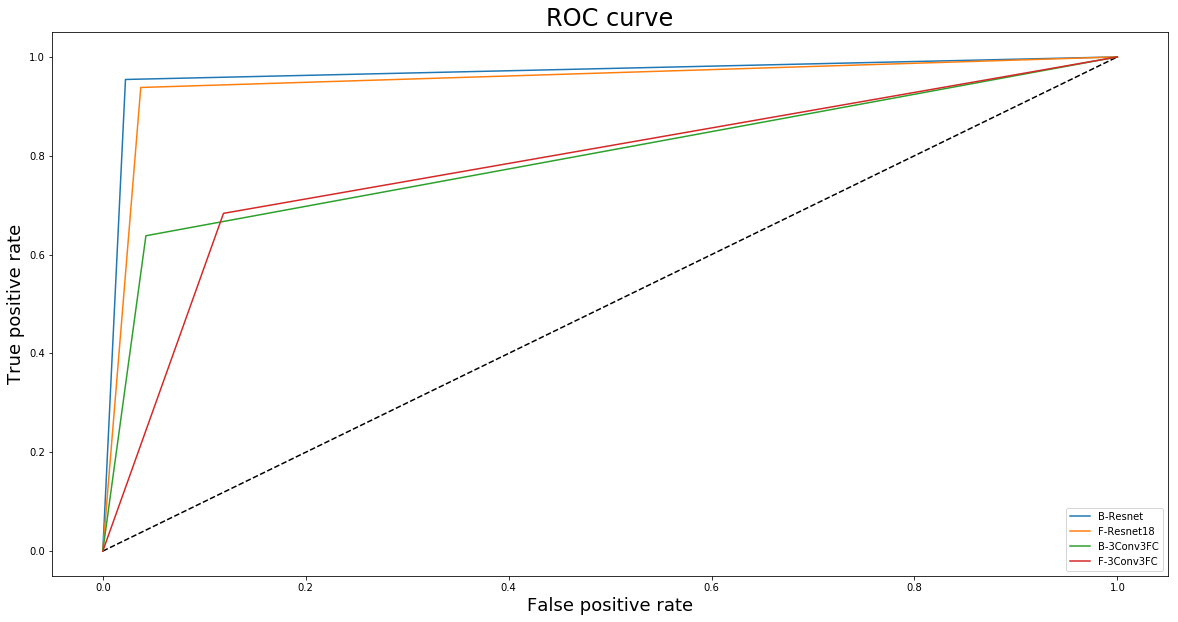

In [81]:

plot_roc_curve(y_all_list=[y_all_dgp, y_all_resnet18, y_all_BBB, y_all_Freq_3Conv3FC], labels=['B-Resnet', 'F-Resnet18', 'B-3Conv3FC', 'F-3Conv3FC'])

# Uncertainty Study

In [102]:
# load data
fc_layer_f3Conv3FC = np.load(f'./network-output/fc_layer-Freq_3Conv3FC.npy')
fc_layer_b3Conv3FC = np.load(f'./network-output/fc_layer-BBB.npy')
fc_layer_fResnet = np.load(f'./network-output/fc_layer-Freq_Resnet18.npy')
# fc_layer_bResnet = np.load(f'./network-output/fc_layer-DKL.npy')

softmax_layer_f3Conv3FC = np.load(f'./network-output/softmax_layer-Freq_3Conv3FC.npy')
softmax_layer_b3Conv3FC = np.load(f'./network-output/softmax_layer-BBB.npy')
softmax_layer_fResnet = np.load(f'./network-output/softmax_layer-Freq_Resnet18.npy')
# softmax_layer_bResnet = np.load(f'./network-output/softmax_layer-DKL.npy')

In [103]:
print('Fully Connected')
print(fc_layer_f3Conv3FC.shape)
print(fc_layer_b3Conv3FC.shape)
print(fc_layer_fResnet.shape)
# print(fc_layer_bResnet.shape)

print('Softmax')
print(fc_layer_f3Conv3FC.shape)
print(fc_layer_b3Conv3FC.shape)
print(fc_layer_fResnet.shape)
# print(fc_layer_bResnet.shape)


Fully Connected
(44005, 2)
(100, 44005, 2)
(44005, 1000)
Softmax
(44005, 2)
(100, 44005, 2)
(44005, 1000)


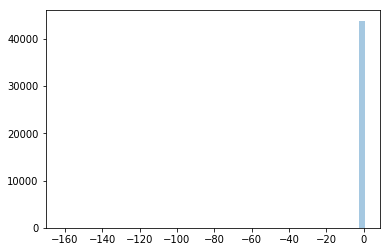

In [108]:
fc_layer_fResnet
sns.distplot(fc_layer_fResnet[:,5], kde=False)

-13726.674

In [97]:
!pwd

/home/alberto/Desktop/repos/random/deep-GP-chest-xray/notebooks


In [16]:
target = target.cpu()
softmax, mixed_fs, samples = softmax.cpu(), mixed_fs.cpu(), samples.cpu()

In [18]:
softmax.shape

torch.Size([400, 100, 2])

In [19]:
mixed_fs.shape

torch.Size([2, 40000])

In [33]:
mixed_fs_transf = mixed_fs.t().view(batch_size, 100, num_classes)
mixed_fs_transf.shape

torch.Size([400, 100, 2])

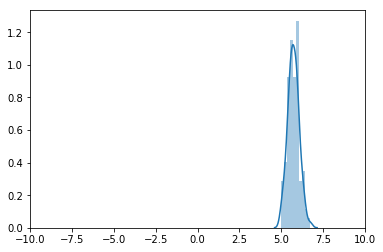

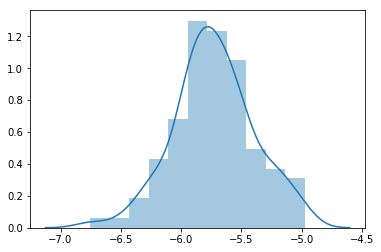

In [37]:
ax = sns.distplot(mixed_fs_transf[0,:,0])
ax.set_xlim([-10, 10])
plt.show()
sns.distplot(mixed_fs_transf[0,:,1])
plt.show()

In [39]:
np.exp(5)

148.4131591025766

In [40]:
np.abs(5.1/10)

0.5

In [20]:
samples.shape

torch.Size([512, 400, 100])

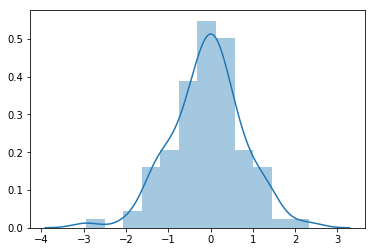

In [26]:
sns.distplot(samples[0,0,:])

In [41]:
mixed_fs_transf[0,0,0]

tensor(5.4505)

In [42]:
mixed_fs_transf[0,0,1]

tensor(-5.5529)

0.49530145227838673

In [16]:
output.probs.shape

torch.Size([800, 2])

In [17]:
samples = samples.cpu().numpy()

NameError: name 'samples' is not defined

In [17]:
import seaborn as sns

/home/alberto/.conda/envs/fastai/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


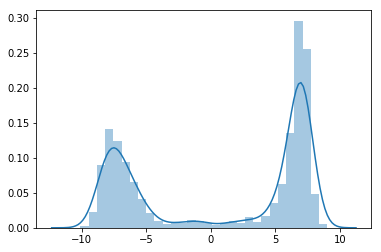

In [18]:
sns.distplot(mixed_fs[0,:].cpu())

In [19]:
samples_mixed_fs.t().shape

torch.Size([80000, 2])

In [20]:
samples_mixed_fs.t().view(batch_size, 100, num_classes).shape

torch.Size([800, 100, 2])

In [25]:
samples_mixed_fs_transformed = samples_mixed_fs.t().view(batch_size, 100, num_classes).cpu()
samples_mixed_fs_transformed.shape

torch.Size([800, 100, 2])

In [22]:
samples_softmax = samples_softmax.cpu()

In [45]:
samples_mixed_fs_transformed[i,:,0].shape

torch.Size([100])

#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
##############

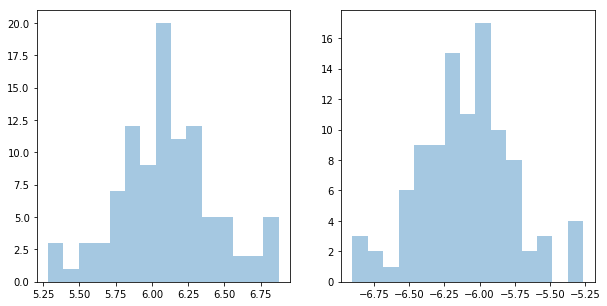

	Softmax
Prediction == 0. Mean = 1.0. Std = 0.0
Prediction == 1. Mean = 0.0. Std = 0.0


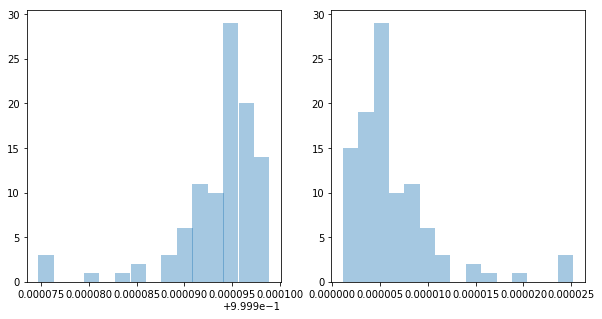

#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
##############

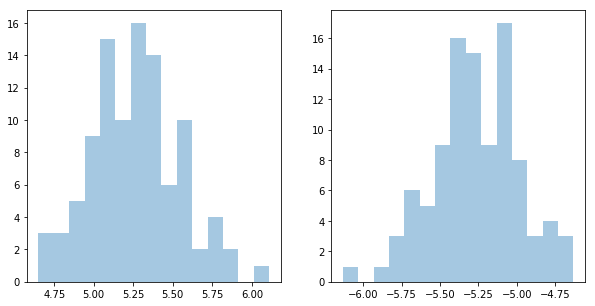

	Softmax
Prediction == 0. Mean = 1.0. Std = 0.0
Prediction == 1. Mean = 0.0. Std = 0.0


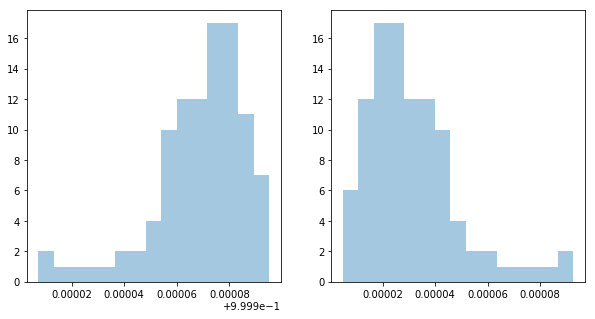

#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
##############

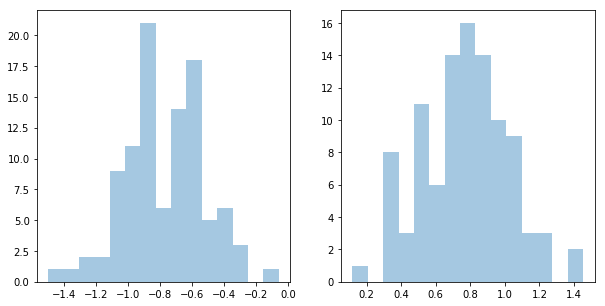

	Softmax
Prediction == 0. Mean = 0.188. Std = 0.074
Prediction == 1. Mean = 0.812. Std = 0.074


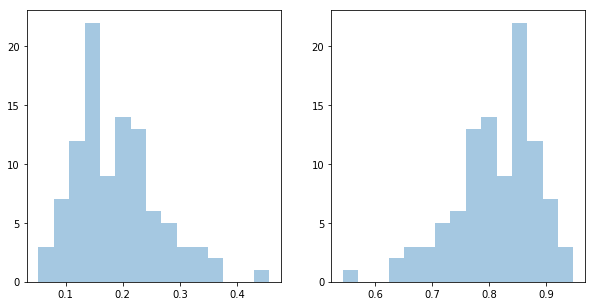

#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
##############

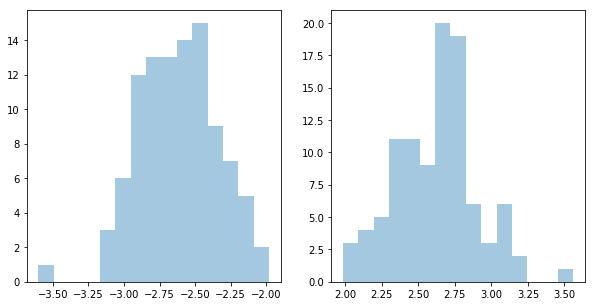

	Softmax
Prediction == 0. Mean = 0.006. Std = 0.004
Prediction == 1. Mean = 0.994. Std = 0.004


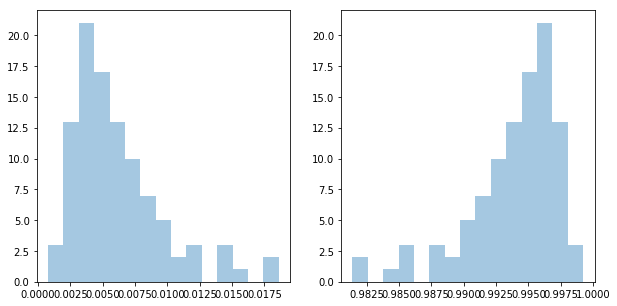

#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
Actual Target: 1
Class predicted: 0
Prediction == 0. Mean = 0.332. Std = 0.243
Prediction == 1. Mean = -0.323. Std = 0.245


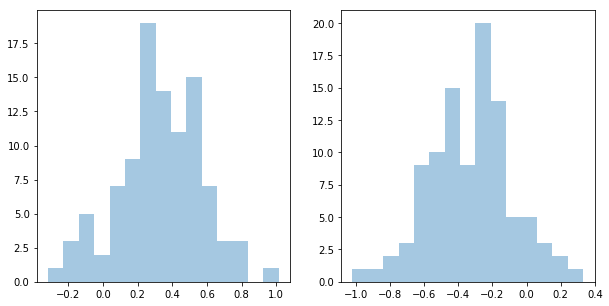

	Softmax
Prediction == 0. Mean = 0.651. Std = 0.105
Prediction == 1. Mean = 0.349. Std = 0.105


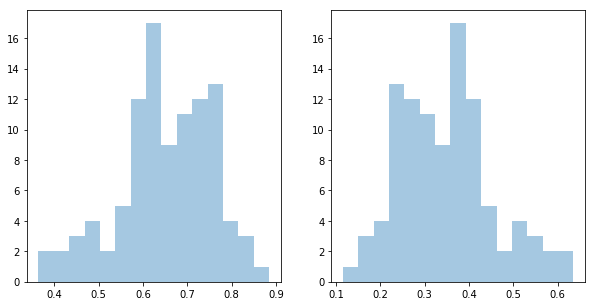

#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
##############

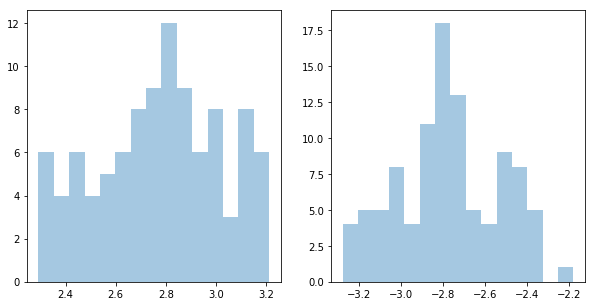

	Softmax
Prediction == 0. Mean = 0.996. Std = 0.002
Prediction == 1. Mean = 0.004. Std = 0.002


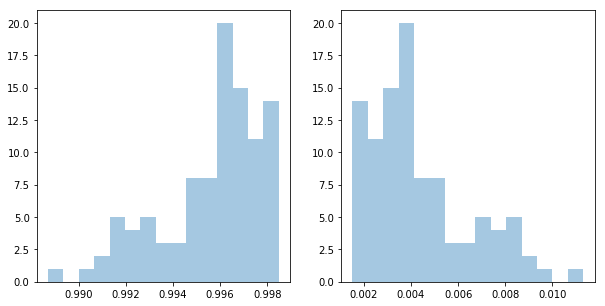

#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
##############

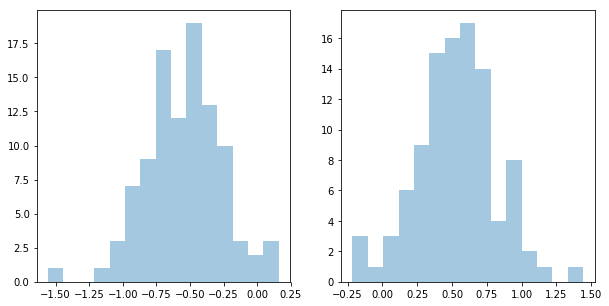

	Softmax
Prediction == 0. Mean = 0.267. Std = 0.106
Prediction == 1. Mean = 0.733. Std = 0.106


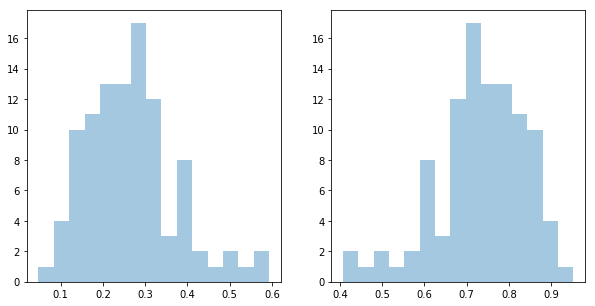

#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################
Actual Target: 0
Class predicted: 1
Prediction == 0. Mean = -1.454. Std = 0.258
Prediction == 1. Mean = 1.46. Std = 0.256


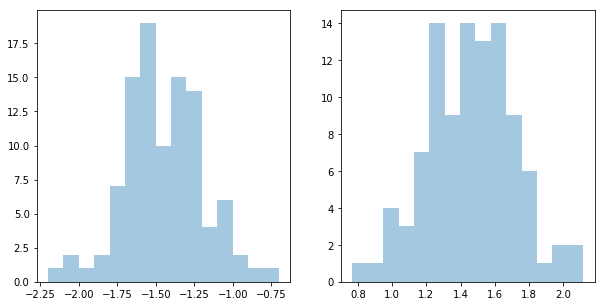

	Softmax
Prediction == 0. Mean = 0.057. Std = 0.029
Prediction == 1. Mean = 0.943. Std = 0.029


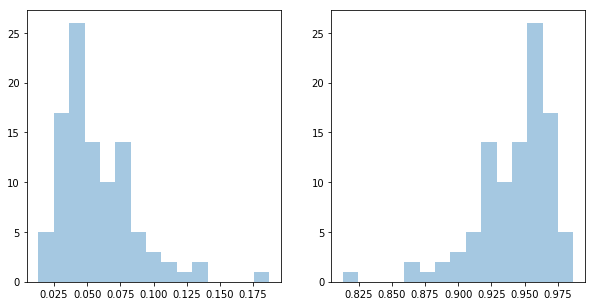

#########################################################
#########################################################
#########################################################
#########################################################


In [45]:
ranges = []
correct = pred.cpu().eq(target.view_as(pred.cpu()))
for i in range(batch_size):
# for i in range(10):
    print('#########################################################')
    target_i = target[i]
    pred_i = output.probs[i,:].cpu().argmax()
    
    ranges.append(float(softmax[i,:,1].max()-softmax[i,:,1].min()))
    
    if target_i != pred_i:
        print(f'Actual Target: {target_i}')
        print(f'Class predicted: {pred_i}')
        
        plt.figure(figsize=(10,5))
        plt.subplot(121)
        class_ = 0
        sns.distplot(mixed_fs_transf[i,:,class_], bins=15, kde=False)
        mean = float(torch.mean(mixed_fs_transf[i,:,class_]))
        std = float(torch.std(mixed_fs_transf[i,:,class_]))
        print(f'Prediction == {class_}. Mean = {round(mean, 3)}. Std = {round(std, 3)}')
    #     plt.hist(samples_img[:, 0], bins=25)

        plt.subplot(122)
        class_ = 1
        sns.distplot(mixed_fs_transf[i,:,class_], bins=15, kde=False)
        mean = float(torch.mean(mixed_fs_transf[i,:,class_]))
        std = float(torch.std(mixed_fs_transf[i,:,class_]))
        print(f'Prediction == {class_}. Mean = {round(mean, 3)}. Std = {round(std, 3)}')
        plt.show()

    #     plt.figure(figsize=(10,5))
    #     sns.distplot(samples_mixed_fs_transformed[i,:,:].reshape(-1), bins=50)
    #     plt.show()
        print('\tSoftmax')
        plt.figure(figsize=(10,5))
        plt.subplot(121)
        class_ = 0 
        ax = sns.distplot(softmax[i,:,class_], bins=15, kde=False)
        mean = float(torch.mean(softmax[i,:,class_]))
        std = float(torch.std(softmax[i,:,class_]))
        print(f'Prediction == {class_}. Mean = {round(mean, 3)}. Std = {round(std, 3)}')
    #     ax.set_xlim([-0.05,1.05])
    #     plt.hist(samples_img[:, 0], bins=25)

        plt.subplot(122)
        class_ = 1
        ax = sns.distplot(softmax[i,:,class_], bins=15, kde=False)
        mean = float(torch.mean(softmax[i,:,class_]))
        std = float(torch.std(softmax[i,:,class_]))
        print(f'Prediction == {class_}. Mean = {round(mean, 3)}. Std = {round(std, 3)}')
    #     ax.set_xlim([-0.05,1.05])
        plt.show()
    
#     plt.figure(figsize=(10,5))
#     sns.distplot(samples_softmax[i,:,:].reshape(-1), bins=500, kde=False)
#     plt.show()

    

In [53]:
(samples_softmax[i,:,0] + samples_softmax[i,:,1]).sum()

tensor(100.)

In [51]:
samples_softmax[i,:100,1]

tensor([2.8988e-06, 5.1841e-06, 6.0128e-06, 9.1687e-06, 5.9303e-06, 4.7068e-06,
        7.7977e-06, 8.3893e-06, 1.3645e-05, 2.5217e-06, 6.3066e-06, 3.2017e-06,
        8.7936e-06, 6.3153e-06, 4.6623e-06, 7.9178e-06, 4.9986e-06, 8.7357e-06,
        4.5916e-06, 7.3439e-06, 3.9528e-06, 7.6004e-06, 2.8939e-06, 3.4992e-06,
        1.2340e-05, 5.2994e-06, 1.2344e-06, 1.2128e-05, 4.8975e-06, 3.8792e-06,
        4.8763e-06, 1.0875e-05, 2.3632e-06, 4.5864e-06, 2.7801e-05, 9.6654e-06,
        4.1531e-06, 1.2566e-05, 1.0318e-05, 5.1657e-06, 2.8386e-06, 8.0653e-06,
        3.7147e-06, 5.8869e-06, 6.1139e-06, 3.3752e-06, 4.8867e-06, 2.7519e-06,
        3.8235e-06, 4.5224e-06, 4.9360e-06, 7.7635e-06, 9.8143e-06, 5.0593e-06,
        7.6984e-06, 5.7662e-06, 2.4981e-05, 9.6285e-06, 3.5060e-06, 2.2815e-06,
        4.1134e-06, 9.6790e-06, 6.5883e-06, 1.4588e-05, 1.2601e-05, 1.0429e-05,
        3.2107e-06, 7.3035e-06, 1.5720e-06, 4.8975e-06, 1.2479e-05, 3.4263e-06,
        2.2844e-06, 1.2639e-05, 8.4776e-

In [37]:
correct = correct.numpy()

In [39]:
import pandas as pd
df_ranges = pd.DataFrame({'correct': list(correct),
                         'ranges': ranges})
df_ranges.head()

,correct,ranges
0,1,0.000070
1,1,0.000024
2,1,0.000003
3,1,0.000008
4,1,0.000100


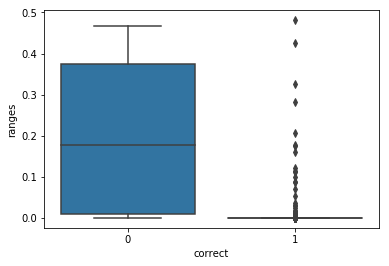

In [57]:
sns.boxplot(x='correct', y='ranges', data=df_ranges, whis=1)

NameError: name 'samples_img' is not defined

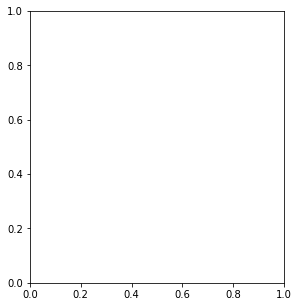

In [21]:
plot_hist(img_samples=samples_mixed_fs.transpose)